In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

DATAPATHS = ['data\\Autism-Adult-Data.csv', 'data\\Autism-Adolescent-Data.csv', 'data\\Autism-Child-Data.csv', 'data\\Autism-Toddler-Data.csv']

In [8]:
df = pd.concat([pd.read_csv(path, true_values=['Yes', 'YES', 'yes'], false_values=['no', 'No', 'NO'], na_values=['?']) for path in DATAPATHS], ignore_index=True)
df.drop(['Unnamed: 0', 'Age_Mons', 'Case_No', 'age_desc'], axis=1, inplace=True)
df.replace({False: 0, True: 1}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154 entries, 0 to 2153
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         2154 non-null   int64  
 1   A2_Score         2154 non-null   int64  
 2   A3_Score         2154 non-null   int64  
 3   A4_Score         2154 non-null   int64  
 4   A5_Score         2154 non-null   int64  
 5   A6_Score         2154 non-null   int64  
 6   A7_Score         2154 non-null   int64  
 7   A8_Score         2154 non-null   int64  
 8   A9_Score         2154 non-null   int64  
 9   A10_Score        2154 non-null   int64  
 10  age              2148 non-null   float64
 11  gender           2154 non-null   object 
 12  ethnicity        2010 non-null   object 
 13  jundice          2154 non-null   int64  
 14  family_autism    2154 non-null   int64  
 15  contry_of_res    1100 non-null   object 
 16  used_app_before  1100 non-null   float64
 17  result        

In [9]:
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,family_autism,contry_of_res,used_app_before,result,relation,class,Qchat-10-Score
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,0,0,United States,0.0,6.0,Self,0,NaN
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,0,1,Brazil,0.0,5.0,Self,0,NaN
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,1,1,Spain,0.0,8.0,Parent,1,NaN
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,0,1,United States,0.0,6.0,Self,0,NaN
4,1,0,0,0,0,0,0,1,0,0,...,f,NaN,0,0,Egypt,0.0,2.0,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2149,0,0,0,0,0,0,0,0,0,1,...,f,White European,0,1,NaN,NaN,NaN,family member,0,1.0
2150,0,0,1,1,1,0,1,0,1,0,...,m,black,1,0,NaN,NaN,NaN,family member,1,5.0
2151,1,0,1,1,1,1,1,1,1,1,...,m,middle eastern,1,0,NaN,NaN,NaN,family member,1,9.0
2152,1,0,0,0,0,0,0,1,0,1,...,m,White European,0,1,NaN,NaN,NaN,family member,0,3.0


In [10]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,jundice,family_autism,used_app_before,result,class,Qchat-10-Score
count,2154.000000,2154.000000,2154.00000,2154.000000,2154.000000,2154.000000,2154.000000,2154.000000,2154.000000,2154.000000,2148.000000,2154.000000,2154.000000,1100.000000,1100.000000,2154.000000,1054.000000
mean,0.632776,0.466110,0.47818,0.521356,0.556639,0.508821,0.561746,0.533890,0.450325,0.604457,12.220981,0.210306,0.150418,0.024545,5.411818,0.520427,5.212524
std,0.482160,0.498966,0.49964,0.499660,0.496897,0.500038,0.496288,0.498966,0.497642,0.489081,13.382829,0.407621,0.357564,0.154806,2.523492,0.499699,2.907304
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000,0.000000,0.000000,0.000000,3.000000,0.000000,3.000000
50%,1.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,5.000000,1.000000,5.000000
75%,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000,0.000000,0.000000,0.000000,7.250000,1.000000,8.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,64.000000,1.000000,1.000000,1.000000,10.000000,1.000000,10.000000


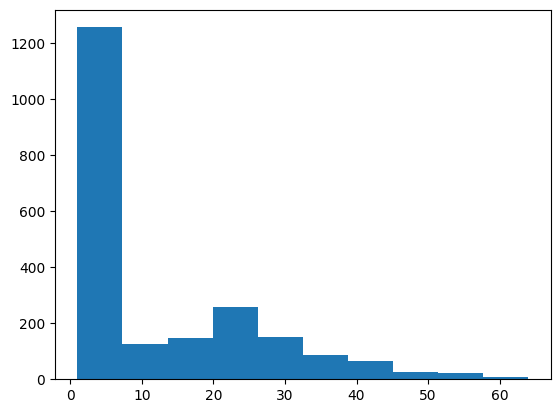

In [4]:
plt.hist(df['age'])
plt.show()